<a href="https://colab.research.google.com/github/gopikanil/dsml/blob/main/pgmdl_1%2C2%2C3%2C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pgm1-perceptron
from sklearn.linear_model import Perceptron
x=[[1,0],[1,1],[2,1]]
y=["Red","Blue","Red"]
ml=Perceptron()
ml=ml.fit(x,y)
result=ml.predict([[1,1],[2,0]])
print(result)

['Blue' 'Red']


In [ ]:
#pgm2-mlpclassifier
from sklearn.neural_network import MLPClassifier
ml=MLPClassifier(hidden_layer_sizes=(10),activation="relu")
ml=ml.fit(x,y)
result=ml.predict([[1,0],[1,1]])
print(result)

['Red' 'Red']


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [18]:
#pgm4-TSNE
import numpy as np
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
from sklearn.datasets import load_iris


In [19]:
iris=load_iris()
x=iris.data
y=iris.target

In [20]:
tsne=TSNE(n_components=2, verbose =1,random_state =123)
z=tsne.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.387669
[t-SNE] KL divergence after 1000 iterations: 0.129141


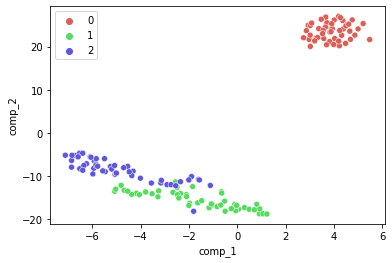

In [21]:
df = pd.DataFrame()
df["y"]=y
df["comp_1"]=z[:,0]
df["comp_2"]=z[:,1]
sb.scatterplot(x="comp_1",y="comp_2",hue=df.y.tolist(),palette=sb.color_palette("hls",3),data=df)

In [22]:
from keras.datasets import mnist
from numpy import reshape
(x_train, y_train), (_ , _) = mnist.load_data()
x_train = x_train[:3000]
y_train = y_train[:3000]
print(x_train.shape) 

11490434/11490434 [==============================] - 0s 0us/step
(3000, 28, 28)


In [23]:
x_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
print(x_mnist.shape)

(3000, 784)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.515s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 607.882413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.365952
[t-SNE] KL divergence after 1000 iterations: 1.271625


[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

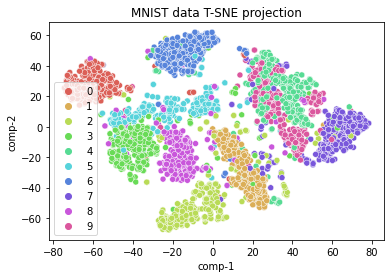

In [24]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_mnist)
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sb.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sb.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

In [ ]:
#pgm3-mlpnn-using-irisdataset
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris = pd.read_csv("sample_data/iris.csv")

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df_norm = iris[['sepal.length','sepal.width','petal.length','petal.width']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,sepal.length,sepal.width,petal.length,petal.width
8,0.027778,0.375000,0.067797,0.041667
105,0.916667,0.416667,0.949153,0.833333
98,0.222222,0.208333,0.338983,0.416667
100,0.555556,0.541667,0.847458,1.000000
44,0.222222,0.750000,0.152542,0.125000


In [ ]:
target = iris[['variety']].replace(['Setosa','Versicolor','Virginica'],[0,1,2])
target.sample(n=5)

,variety
125,2
74,1
139,2
65,1
51,1


In [ ]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,sepal.length,sepal.width,petal.length,petal.width,variety
13,0.000000,0.416667,0.016949,0.000000,0
145,0.666667,0.416667,0.711864,0.916667,2
57,0.166667,0.166667,0.389831,0.375000,1
118,0.944444,0.250000,1.000000,0.916667,2
115,0.583333,0.500000,0.728814,0.916667,2


In [ ]:
train, test = train_test_split(df, test_size = 0.3)
trainX = train[['sepal.length','sepal.width','petal.length','petal.width']]# taking the training data features
trainY=train.variety# output of our training data
testX= test[['sepal.length','sepal.width','petal.length','petal.width']] # taking test data features
testY =test.variety   #output value of test data
trainX.head(5)

,sepal.length,sepal.width,petal.length,petal.width
137,0.583333,0.458333,0.762712,0.708333
39,0.222222,0.583333,0.084746,0.041667
132,0.583333,0.333333,0.779661,0.875000
83,0.472222,0.291667,0.694915,0.625000
40,0.194444,0.625000,0.050847,0.083333


In [ ]:
clf.fit(trainX, trainY.ravel())

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
              solver='lbfgs')

In [ ]:
prediction = clf.predict(testX)
print(prediction)

[0 2 0 2 2 0 0 1 0 2 2 2 0 2 2 2 2 1 2 1 1 1 1 2 1 0 0 1 2 2 0 1 1 1 0 0 0
 2 1 1 1 1 0 0 1]


In [ ]:
print(testY.values)

[0 2 0 2 2 0 0 1 0 2 2 2 0 2 2 2 2 2 2 1 1 2 1 2 1 0 0 1 2 2 0 1 2 1 0 0 0
 2 1 1 1 1 0 0 1]


In [ ]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,testY)*100)

The accuracy of the Multi-layer Perceptron is: 93.33333333333333


In [ ]:
from sklearn.neural_network import MLPClassifier
ml=MLPClassifier(hidden_layer_sizes=(10),activation="relu")
ml=ml.fit(df_norm,target)
result=ml.predict([[0.5,0.7,0.6,0.4]])
if result==[0]:
  print("setosa")
elif result==[1]:
  print("versicolor")
else:
  print("viriginica")

viriginica


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
